# Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

In [2]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


# We will make an impact analysis of CO2EMISSIONS based on 'ENGINESIZE','CYLINDERS' and 'FUELCONSUMPTION_CITY'


array([[<Axes: title={'center': 'ENGINESIZE'}>,
        <Axes: title={'center': 'CYLINDERS'}>],
       [<Axes: title={'center': 'FUELCONSUMPTION_CITY'}>,
        <Axes: title={'center': 'CO2EMISSIONS'}>]], dtype=object)

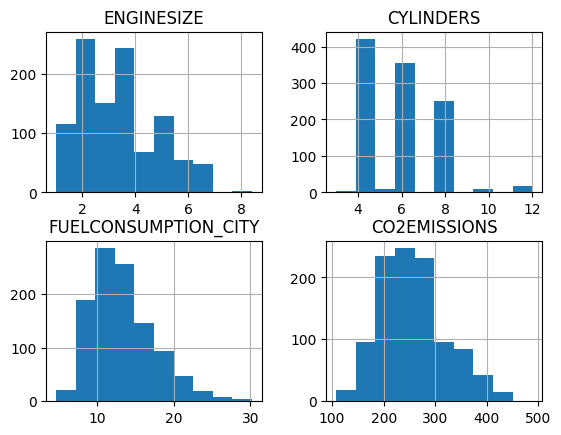

In [4]:
df_analysis = df[
    ["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY", "CO2EMISSIONS"]
].astype(float)
df_analysis.hist()

In [5]:
df_analysis.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,256.228679
std,1.415895,1.797447,4.101253,63.372304
min,1.000000,3.000000,4.600000,108.000000
25%,2.000000,4.000000,10.250000,207.000000
50%,3.400000,6.000000,12.600000,251.000000
75%,4.300000,8.000000,15.550000,294.000000
max,8.400000,12.000000,30.200000,488.000000


In [6]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENGINESIZE            1067 non-null   float64
 1   CYLINDERS             1067 non-null   float64
 2   FUELCONSUMPTION_CITY  1067 non-null   float64
 3   CO2EMISSIONS          1067 non-null   float64
dtypes: float64(4)
memory usage: 33.5 KB


# make scatter plot of df_analysis


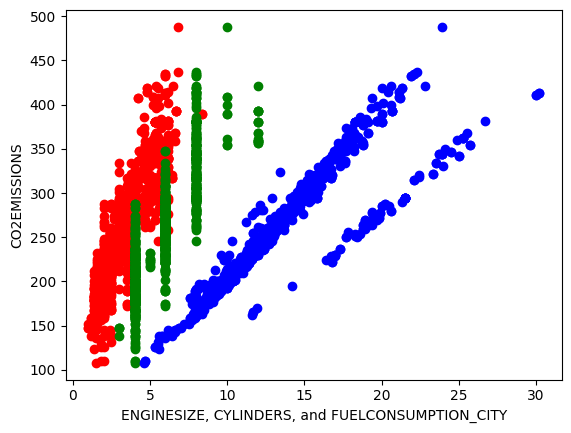

In [7]:
plt.scatter(df_analysis.ENGINESIZE, df_analysis.CO2EMISSIONS, color="red")
plt.scatter(df_analysis.CYLINDERS, df_analysis.CO2EMISSIONS, color="green")
plt.scatter(df_analysis.FUELCONSUMPTION_CITY, df_analysis.CO2EMISSIONS, color="blue")
plt.xlabel("ENGINESIZE, CYLINDERS, and FUELCONSUMPTION_CITY")
plt.ylabel("CO2EMISSIONS")
plt.show()

# make a model


In [8]:
x = df_analysis[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY"]]
y = df_analysis[["CO2EMISSIONS"]]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [11]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

print("Coefficients: ", reg.coef_)
print("Intercept: ", reg.intercept_)

Coefficients:  [[11.79940248  5.91324333  8.33691635]]
Intercept:  [71.97120933]


In [12]:
y_pred = reg.predict(X_test)

print("Mean absolute error (MAE): %.2f" % mean_absolute_error(y_pred, y_test))
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_pred, y_test))
print(
    "Roots Mean squared error (RMSE): %.2f"
    % math.sqrt(mean_squared_error(y_pred, y_test))
)
print("R2-score: %.2f" % r2_score(y_pred, y_test))

Mean absolute error (MAE): 16.76
Mean squared error (MSE): 508.64
Roots Mean squared error (RMSE): 22.55
R2-score: 0.85
